# Make the Computer SEE

# day 147 and day 149 and day 150 and day 152

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import matplotlib.image as image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Convolutional Neural Networks:


# convolutional Neural Networks:

* input_shape: (batchsize,height of the image, width of the image, 3 for colors(RGB))

* Convolution layer: Extracts/learns the most important features of the image(i think using the eigen values and eigen vectors of the image). it is activated with tf.keras.layers.Convxd. where x in Convxd stands for multiple values usually range between 1-3 it will come out as tf.keras.layers.Conv2D, tf.keras.layers.Conv1D and tf.keras.layers.Conv3D.


* Hidden layers: activation is usually is Relu for nonlinear data.

* Pooled layer: Reduces the dimensionality of the learned image features. tf.keras.layers.AvgPool2D

* Fully Connected Layer: further refines the learned features from the Convolutional Neural Network.

* output layer: for binary classification use sigmoid and for multiclass classification use softmax activation.





# Get the Data

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


--2023-08-15 12:46:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 173.194.69.128, 173.194.79.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  31.4MB/s    in 3.3s    

2023-08-15 12:46:12 (31.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# unzip the zipped file from pizza_steak.zip
import zipfile
zip_ref = zipfile.ZipFile("pizza_steak.zip") # pizza_steak is the file name of the zipped file
zip_ref.extractall()
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Inspect the Data

In [ ]:
!ls pizza_steak

# ! means bang
# ls means list
# pizza_steak is the file name

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.220
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.44
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
!cat /proc/meminfo

MemTotal:       13294252 kB
MemFree:         9582496 kB
MemAvailable:   12340672 kB
Buffers:          328612 kB
Cached:          2612204 kB
SwapCached:            0 kB
Active:           681128 kB
Inactive:        2771124 kB
Active(anon):       1760 kB
Inactive(anon):   511696 kB
Active(file):     679368 kB
Inactive(file):  2259428 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               392 kB
Writeback:             0 kB
AnonPages:        505720 kB
Mapped:           289252 kB
Shmem:              2020 kB
KReclaimable:     120672 kB
Slab:             157320 kB
SReclaimable:     120672 kB
SUnreclaim:        36648 kB
KernelStack:        4192 kB
PageTables:         9032 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6647124 kB
Committed_AS:    2000576 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        9108 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
# count the total number of images of pizza in the training data in pizza_steak directory

!ls -ltr pizza_steak/train/pizza | wc -l


# our linux knowledge gets used here.

751


In [ ]:
# count how many test pizza images are ther
!ls -ltr pizza_steak/test/pizza | wc -l

# i think one extra line is counted so we may have in total 250 test images and 750 training images.

251


In [ ]:
# doing the same in a differnt way

# import the operating system
import os


# walk thorough the pizza_steak directory and list the number of files
for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print('There are {} directories and {} images in {}'.format(len(dirnames),len(filenames),dirpath))


There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [ ]:
# another way to find how many pizza images are there in the training data set

import os

len(os.listdir('pizza_steak/train/pizza'))

750

In [ ]:
# how many images of pizza are there in the test dataset
len(os.listdir('pizza_steak/test/pizza'))

250

# visualizing the images

In [ ]:
# getting the class_names programatically

os.listdir('pizza_steak/train')

['steak', 'pizza']

In [ ]:
sorted(os.listdir('pizza_steak/train'))

['pizza', 'steak']

In [ ]:
class_names = sorted(os.listdir('pizza_steak/train'))
class_names

['pizza', 'steak']

In [ ]:
# instructor's way of getting the class_names
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
print(data_dir)

pizza_steak/train


In [ ]:
data_dir.glob('*')


# pathlib.path creates a path for the directory 'pizza_steak/train' and it is stored in data_dir, it is unnecessary.
# data_dir.glob searches the directory and gets all relative files that mathces a particular pattern that is mentioned
# in the parenthesis.
# inside the parentheis a wildcard is used ('*') which means take all the files that are in it. it is just like in linux.

<generator object Path.glob at 0x7aa4e05538b0>

In [ ]:
np.array(sorted([item for item in data_dir.glob('*')]))

array([PosixPath('pizza_steak/train/pizza'),
       PosixPath('pizza_steak/train/steak')], dtype=object)

In [ ]:
# extract only the names

np.array(sorted([item.name for item in data_dir.glob('*')]))

# hence we got the class names in the instructor's way)

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# or simply we could have written the class-names like this also

class_names = ['pizza', 'steak']
class_names

['pizza', 'steak']

In [ ]:
# lets visualize our image:
import matplotlib.pyplot as plt
import matplotlib.image as image
import os

def view_random_image(target_dir,target_class):

  # getting all images from the specified directory and class(pizza or steak)
  folder = target_dir + '/' + target_class

  # get all the images by accessing the folder
  all_images = os.listdir(folder)


  # choosing an image randomly from all images.
  random_image = np.random.choice(all_images)

  # reading that random jpg image from random_image and converting it into numbers(machine_readable)
  # please pass in the full address of the image.
  img = image.imread(folder + '/' + random_image )


  # show the image from img
  plt.imshow(img)
  plt.title(target_class)


  # turn the ugly axes off
  plt.axis('off')

  # print the shape of the image.
  print('Image shape {}'.format(img.shape))






Image shape (384, 512, 3)


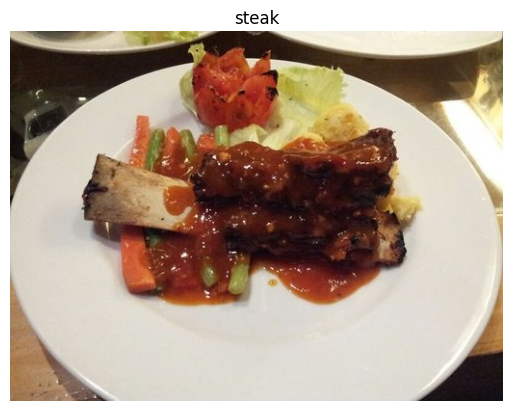

In [ ]:
view_random_image(target_dir='pizza_steak/train',target_class='steak')

# exploration,analysis and freethrows

In [ ]:
a = np.array([33,88,99,13,15,19])

np.random.choice(a)

33

In [ ]:
os.listdir('pizza_steak/train/steak')

['1645470.jpg',
 '234626.jpg',
 '3372616.jpg',
 '674001.jpg',
 '60633.jpg',
 '2403907.jpg',
 '2707522.jpg',
 '911803.jpg',
 '1445352.jpg',
 '663014.jpg',
 '1539499.jpg',
 '1367035.jpg',
 '1925230.jpg',
 '1290362.jpg',
 '1816235.jpg',
 '2907177.jpg',
 '2458401.jpg',
 '2133717.jpg',
 '3524429.jpg',
 '332232.jpg',
 '3671877.jpg',
 '2045647.jpg',
 '3435358.jpg',
 '2140776.jpg',
 '2042975.jpg',
 '4176.jpg',
 '296268.jpg',
 '2548974.jpg',
 '1049459.jpg',
 '2965021.jpg',
 '704316.jpg',
 '1335556.jpg',
 '2644457.jpg',
 '295491.jpg',
 '2538000.jpg',
 '1995252.jpg',
 '1595869.jpg',
 '838344.jpg',
 '2912290.jpg',
 '703909.jpg',
 '2832499.jpg',
 '2599817.jpg',
 '3578934.jpg',
 '268444.jpg',
 '225990.jpg',
 '3518960.jpg',
 '215222.jpg',
 '885571.jpg',
 '187521.jpg',
 '1563266.jpg',
 '3663518.jpg',
 '1348047.jpg',
 '1295457.jpg',
 '393349.jpg',
 '830007.jpg',
 '134598.jpg',
 '2489716.jpg',
 '482465.jpg',
 '1636831.jpg',
 '2989882.jpg',
 '3434983.jpg',
 '233964.jpg',
 '2036920.jpg',
 '523535.jpg',
 '

In [ ]:
target_dir = 'pizza_steak/train'
target_class = 'steak'

os.listdir(target_dir + '/' + target_class)

['1645470.jpg',
 '234626.jpg',
 '3372616.jpg',
 '674001.jpg',
 '60633.jpg',
 '2403907.jpg',
 '2707522.jpg',
 '911803.jpg',
 '1445352.jpg',
 '663014.jpg',
 '1539499.jpg',
 '1367035.jpg',
 '1925230.jpg',
 '1290362.jpg',
 '1816235.jpg',
 '2907177.jpg',
 '2458401.jpg',
 '2133717.jpg',
 '3524429.jpg',
 '332232.jpg',
 '3671877.jpg',
 '2045647.jpg',
 '3435358.jpg',
 '2140776.jpg',
 '2042975.jpg',
 '4176.jpg',
 '296268.jpg',
 '2548974.jpg',
 '1049459.jpg',
 '2965021.jpg',
 '704316.jpg',
 '1335556.jpg',
 '2644457.jpg',
 '295491.jpg',
 '2538000.jpg',
 '1995252.jpg',
 '1595869.jpg',
 '838344.jpg',
 '2912290.jpg',
 '703909.jpg',
 '2832499.jpg',
 '2599817.jpg',
 '3578934.jpg',
 '268444.jpg',
 '225990.jpg',
 '3518960.jpg',
 '215222.jpg',
 '885571.jpg',
 '187521.jpg',
 '1563266.jpg',
 '3663518.jpg',
 '1348047.jpg',
 '1295457.jpg',
 '393349.jpg',
 '830007.jpg',
 '134598.jpg',
 '2489716.jpg',
 '482465.jpg',
 '1636831.jpg',
 '2989882.jpg',
 '3434983.jpg',
 '233964.jpg',
 '2036920.jpg',
 '523535.jpg',
 '

In [ ]:
np.random.choice(os.listdir('pizza_steak/train/steak'))



'3478318.jpg'

In [ ]:
random_image = np.random.choice(os.listdir('pizza_steak/train/steak'))

img = image.imread('pizza_steak/train/steak' + '/' + random_image)


img

array([[[148,  74,  29],
        [140,  66,  21],
        [134,  60,  13],
        ...,
        [246, 245, 241],
        [245, 244, 240],
        [244, 243, 239]],

       [[130,  56,  11],
        [120,  47,   2],
        [119,  45,   0],
        ...,
        [245, 244, 240],
        [245, 244, 240],
        [245, 244, 240]],

       [[131,  58,  15],
        [121,  50,   6],
        [118,  45,   2],
        ...,
        [244, 243, 239],
        [245, 244, 240],
        [245, 244, 240]],

       ...,

       [[ 89,  37,  16],
        [ 92,  40,  19],
        [ 92,  40,  19],
        ...,
        [ 81,  30,   9],
        [ 86,  35,  14],
        [ 84,  34,  11]],

       [[ 92,  32,   8],
        [ 94,  34,  10],
        [ 95,  35,  11],
        ...,
        [ 74,  26,   4],
        [ 79,  31,   8],
        [ 78,  31,   5]],

       [[ 96,  32,   5],
        [ 97,  33,   6],
        [ 97,  33,   8],
        ...,
        [ 71,  23,   0],
        [ 79,  31,   8],
        [ 81,  34,   8]]

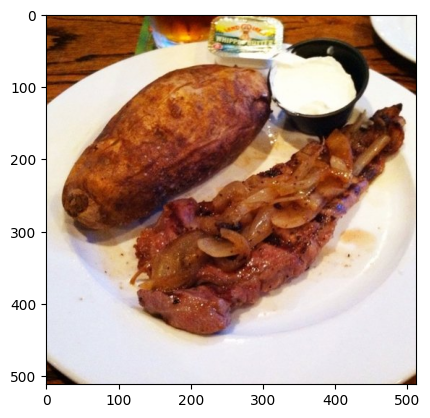

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(512, 512, 3)

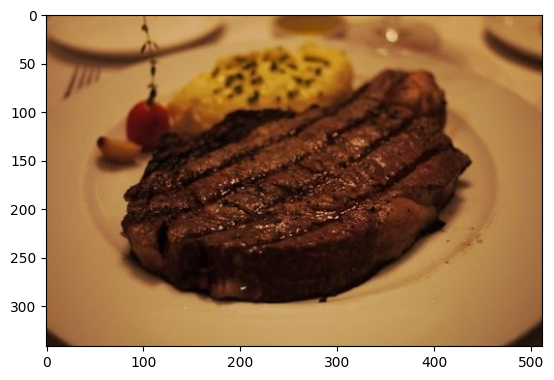

In [ ]:
img = image.imread('pizza_steak/train/steak' + '/' + np.random.choice(os.listdir('pizza_steak/train/steak')))

plt.imshow(img)

In [ ]:
type(img)

numpy.ndarray

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(342, 512, 3), dtype=uint8, numpy=
array([[[134,  75,  41],
        [137,  78,  44],
        [142,  84,  47],
        ...,
        [176, 122,  60],
        [175, 119,  58],
        [174, 118,  57]],

       [[137,  78,  44],
        [140,  81,  47],
        [145,  87,  50],
        ...,
        [176, 122,  60],
        [175, 119,  58],
        [174, 118,  57]],

       [[142,  83,  49],
        [145,  86,  52],
        [151,  93,  56],
        ...,
        [177, 121,  60],
        [175, 119,  58],
        [173, 117,  56]],

       ...,

       [[ 34,  24,  22],
        [ 33,  24,  19],
        [ 33,  22,  16],
        ...,
        [ 38,  25,  16],
        [ 35,  25,  15],
        [ 35,  25,  15]],

       [[ 35,  26,  21],
        [ 33,  24,  19],
        [ 33,  22,  16],
        ...,
        [ 38,  25,  16],
        [ 36,  26,  16],
        [ 35,  25,  15]],

       [[ 35,  26,  21],
        [ 33,  24,  19],
        [ 33,  22,  16],
        ...,
        [ 38,  25,  1

# normalizing the images


* you can normalize or in other words scale any image to make it have values between 0 and 1 by dividing it by 255.

* the number 255 is the maximum pixel value.

In [ ]:
img/255


# now img has values only ranging between 0 and 1.

array([[[0.5254902 , 0.29411765, 0.16078431],
        [0.5372549 , 0.30588235, 0.17254902],
        [0.55686275, 0.32941176, 0.18431373],
        ...,
        [0.69019608, 0.47843137, 0.23529412],
        [0.68627451, 0.46666667, 0.22745098],
        [0.68235294, 0.4627451 , 0.22352941]],

       [[0.5372549 , 0.30588235, 0.17254902],
        [0.54901961, 0.31764706, 0.18431373],
        [0.56862745, 0.34117647, 0.19607843],
        ...,
        [0.69019608, 0.47843137, 0.23529412],
        [0.68627451, 0.46666667, 0.22745098],
        [0.68235294, 0.4627451 , 0.22352941]],

       [[0.55686275, 0.3254902 , 0.19215686],
        [0.56862745, 0.3372549 , 0.20392157],
        [0.59215686, 0.36470588, 0.21960784],
        ...,
        [0.69411765, 0.4745098 , 0.23529412],
        [0.68627451, 0.46666667, 0.22745098],
        [0.67843137, 0.45882353, 0.21960784]],

       ...,

       [[0.13333333, 0.09411765, 0.08627451],
        [0.12941176, 0.09411765, 0.0745098 ],
        [0.12941176, 0

# blueprint for building cnn model

1. Load our images
2. Preprocess our images.
3. Build a CNN model to find pattern in our images
4. Compile the CNN
5. Fit the CNN model with data

In [ ]:
# setting the randomseed for reproducability.
tf.random.set_seed(42)


#1. Load our images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# scales it (make the values range between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# getting the directories of train and test
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# import data from the directories and convert them into different batches

# batch size=32 (compartmentalizes the training data into 32 batches)
# class_mode = 'binary' for classifying only two images.if it was for multi-class classification we would used sparse
# seed = 42 is for keeping the randomness remain consistent over iterations
train_data = train_datagen.flow_from_directory(directory=train_dir,
                           batch_size=32,
                           class_mode='binary',
                           target_size=(224,224),
                           seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)


# build a CNN model:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=3,
                                 activation='relu',
                                 input_shape=(224,224,3),
                                 name='Input_layer'))
model.add(tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation='sigmoid',name='Output_layer'))

# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# fit the model
history = model.fit(train_data,
          epochs=6,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=len(test_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/6
47/47 [==============================] - 22s 177ms/step - loss: 0.6229 - accuracy: 0.6560 - val_loss: 0.4814 - val_accuracy: 0.7640
Epoch 2/6
47/47 [==============================] - 6s 121ms/step - loss: 0.4697 - accuracy: 0.7813 - val_loss: 0.3726 - val_accuracy: 0.8400
Epoch 3/6
47/47 [==============================] - 7s 148ms/step - loss: 0.4238 - accuracy: 0.8140 - val_loss: 0.3378 - val_accuracy: 0.8520
Epoch 4/6
47/47 [==============================] - 6s 123ms/step - loss: 0.4215 - accuracy: 0.8160 - val_loss: 0.3472 - val_accuracy: 0.8520
Epoch 5/6
47/47 [==============================] - 7s 145ms/step - loss: 0.3739 - accuracy: 0.8373 - val_loss: 0.3341 - val_accuracy: 0.8440
Epoch 6/6
47/47 [==============================] - 6s 124ms/step - loss: 0.3387 - accuracy: 0.8680 - val_loss: 0.3728 - val_accuracy: 0.8200


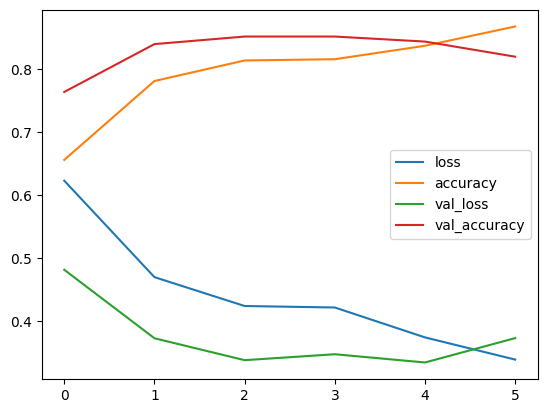

In [ ]:
pd.DataFrame(history.history).plot()


plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Conv2D)        (None, 222, 222, 10)      280       
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# exploration,analysis and freethrows

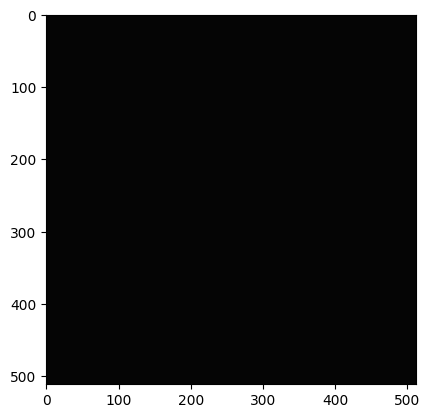

In [ ]:
# how would the image look if all the pixels in the picture are of same color represented by the number 5.


array = np.ones((512,512,3),dtype=int)*5

tensor = tf.constant(array)


# show the image
plt.imshow(tensor)

# it is black when the all pixels are close to 0 and white when all pixels are close to 255

In [ ]:
# there are 47 batches of train_data (x_train,y_train)

len(train_data)

47

In [ ]:
# there are 16 batches of test data

len(test_data)

16

# neural network is like z score.

* yes it is like a z score. just look at this neural_network = weight * input + bias, z_score = std* input + mean. you see the similarity? But the difference comes from the fact that it takes many inputs sum(weights* inputs) + bias,whereas z_score just takes one input = std*input + mean.

**Note: the difference is neural network takes many inputs but z score takes only one inputs.**

# day 150

# Convolutional Neural Network:

* To make the computer/neural networks learn from Images and classify them correctly we need convolutional neural network.

* CNN can be used for various computer vision tasks such as Image processing, segmentation, classification, and object detection.

* the procedure is; convert the Images to numbers using Image.imread(), and then feed the data to a Conv2D neural network.


# Input,weight,bias,output:

* Inputs of an image could be pattern in a particular pixel which will have some RGB color combination number assigned to it.

* Element-wise (hadammard multiplication) is done with each input matrix and the corresponding weight matrix which is also known as kernel matrix which is then then added with bias to create the output which is to be used as an input in the subsequent neural layer.

* output(s) of one neural layer will be used as inputs for the subsequent neural layer.

# filter, kernel,padding,stride and other hyperparameters of Conv2D:

* filter: filter is a window which glosses over the input image. if you set filter=10, then it extracts 10 features from the image. each feature is different from the other. more filters = more features extraction.

* kernel: is similar to learning rate, just like a larger learning rate would have a big space of exploration, a larger would have a big space of exploration on the image. A kernel length of 2 would create 2*2 matrix space of exploration on the image similarly a kernel length of 3 would create a 3*3 matrix space of exploration on the image. lower the kernel the better in most cases,except when the image dimension is too large and you might want the model to have a bird view of the image.

* padding: segments the space of exploration, higher the padding, larger is the number of segmentations on the space of exploration. padding is often used when the image has significant features on its edges. padding adds extra zero's on the edges increasing the space of exploration, so if the image has values other than zeros those values can be extracted. just remember to use padding when you have images whose values fall on the edges like circles, rim of the wheel, etc. padding='same' adds no padding which means no extra zeros on the edges, padding='valid' adds padding.

* stride: stride is the distance of steps the kernel matrix makes on the space of exploration. larger stride might help to reduce the chance of overfitting skipping the superflous details of the image but it comes at the expense of sacrificing the details.


# Activation Function(Relu,sigmoid):

* Relu performs better than sigmoid because it takes less time for execution.
* CNN models trained with Relu are comparitively faster than those that were trained with sigmoid.

# softmax:

* makes sure that Cnn outputs to a maximum value of 1.

* this creates that probability distribution of its choice. it may tell you 99% dog 1% rat something like that.


# Max pooling.

* The Hyper parameters that Max pooling takes are:  kernel size and stride length.

* the kernel matrix has a bunch of weights, so kernel matrix is a weight matrix.

* Maxpooling technique takes the maximum weight of a kernel matrix and use it yield a portion of the output. the process goes on iteratively until the space of exploration(inputs) ends.

# Flatten-layer:

* we have to flatten the inputs that are multidimensional to one-dimension. we do this because the sigmoid or softmax function in output layer takes only a one-dimensional data(that is a scaler).






# day 152

# building a non-cnn model to see if it accurately classifies the images

In [ ]:
# setting the random seed
tf.random.set_seed(42)


# builing the model
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(224,224,3)))
model2.add(tf.keras.layers.Dense(units=10,activation='relu'))
model2.add(tf.keras.layers.Dense(units=10,activation='relu'))
model2.add(tf.keras.layers.Dense(units=10,activation='relu'))
model2.add(tf.keras.layers.Dense(units=10,activation='relu'))
model2.add(tf.keras.layers.Dense(units=10,activation='relu'))
model2.add(tf.keras.layers.Dense(units=1,activation='sigmoid',name='output_layer'))


# compiling the model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])


# fit the model
history2 = model2.fit(train_data,
           epochs=6,
           steps_per_epoch=len(train_data),
           validation_data=test_data,
           validation_steps=len(test_data))

Epoch 1/6
47/47 [==============================] - 11s 144ms/step - loss: 0.9725 - accuracy: 0.4973 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 2/6
47/47 [==============================] - 7s 143ms/step - loss: 0.6817 - accuracy: 0.5993 - val_loss: 0.6575 - val_accuracy: 0.7160
Epoch 3/6
47/47 [==============================] - 6s 137ms/step - loss: 0.6230 - accuracy: 0.7160 - val_loss: 0.5716 - val_accuracy: 0.6920
Epoch 4/6
47/47 [==============================] - 5s 111ms/step - loss: 0.5499 - accuracy: 0.7220 - val_loss: 0.5126 - val_accuracy: 0.7360
Epoch 5/6
47/47 [==============================] - 6s 137ms/step - loss: 0.5056 - accuracy: 0.7533 - val_loss: 0.4892 - val_accuracy: 0.7720
Epoch 6/6
47/47 [==============================] - 5s 110ms/step - loss: 0.5082 - accuracy: 0.7467 - val_loss: 0.5284 - val_accuracy: 0.7120


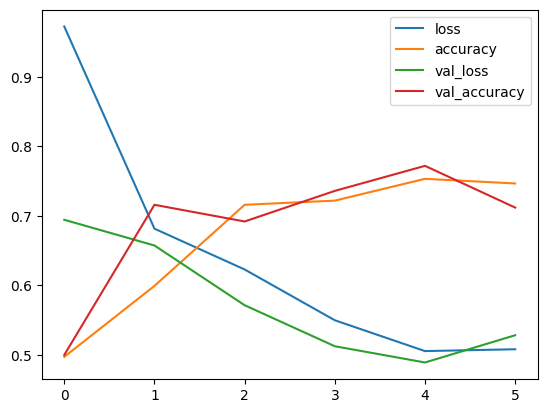

In [ ]:
pd.DataFrame(history2.history).plot()

plt.show()

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 10)                1505290   
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                

# conclusion:

* it is not as bad as i expected it to look. Non-CNN model also did a pretty good job.

* but it is not as good as CNN model either. and it takes many times the number of total parameters of the CNN model to get this non-CNN model to get that 74% accuracy which is quite off-putting if you think about it.

# learning about CNN and neural networks part 2:


# How random values are refined to perfection?

* initially the kernel matrix is given a set of random values. this is for explorability.

* then the random values in kernel matrix and pixel values in the image are hadammard multiplied (element-wise multiplication).

* then it is passed to relu function (that nullifies the negative value and outputs only the positive values resembling neurons in the organism's brain).

* then it is passed to binarycrossentropy function, this is where cool things happen, the network compares the real image with the image it came up with random_values, which is then optimized using a optimizer such as Adam or SGD and those intially-set random values are updated to closely resemble the values of the real picture as much as it possibly can.


# how the networks learn which were the important features in the image and which weren't?

* for this purpose we have MaxPool2D layer.

* MaxPool2D takes the maximum values in the kernels in the specified shape. that is the way of filtering the important features of the image.

* the pixels with lower value when hadammard multiplied with values of kernel matrix would yield lower values which will be declined or neglected when MaxPooling that's how the networks learn the important features of the image.


# why we batch the images (or any inputs)?

*  lets say you got 1 billion images

* our cpu,gpu,tpu may not have the enough processing power to pull off the feat of processing all 1 billion images at once.it will break and all kinds of chaos might ensue that's why batch.

* batching allows for making comparision between one batch's result with the othter.if all images were too be processed at once then no learning would happen. we learn or anything in nature learns by comparing!


# day 152, day 153,day 154

# breaking the code into bits and pieces for thorough comprehension!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:


# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


--2023-08-17 13:41:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.9MB/s    in 5.7s    

2023-08-17 13:41:34 (18.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import zipfile

zip = zipfile.ZipFile('pizza_steak.zip')
zip.extractall()
zip.close()

In [ ]:
# class_name

class_names = sorted(os.listdir('pizza_steak/train'))
class_names

['pizza', 'steak']

In [ ]:
# view random images

def view_random_image(dir,class_name):
  folder = dir + '/' + class_name

  random_image = np.random.choice(os.listdir(folder))

  # read the image

  img = image.imread(folder + '/' + random_image)

  # show the image
  plt.imshow(img)

  plt.title('class_name')

  plt.axis('off')

  print('shape of the image is {}'.format(img.shape))


  plt.show()

shape of the image is (512, 512, 3)


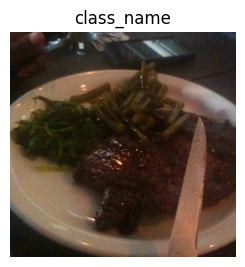

shape of the image is (512, 306, 3)


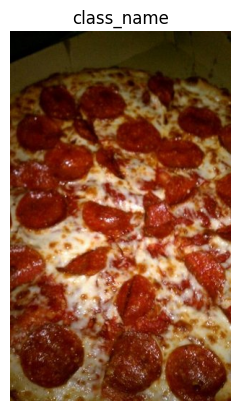

In [ ]:
# visualize the image

plt.figure()
plt.subplot(1,2,1)
view_random_image(dir='pizza_steak/train',class_name='steak')
plt.subplot(1,2,2)
view_random_image(dir='pizza_steak/test',class_name='pizza')

In [ ]:
# preparing the training and testing data (the more efficient  way)

# train and test directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# training and testing data extraction
train_data = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                         batch_size=32,
                                                         image_size=(224,224),
                                                         label_mode='binary',
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                        batch_size=32,
                                                        image_size=(224,224),
                                                        label_mode='binary',
                                                        seed=42)

# normalizing or rescaling will be done while building the model

# building the model with 1 rescale layer 3 conv2d layers and 1 flatten layer and 1 Dense layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=(3,3),
                                 padding='valid',
                                 strides=(1,1),
                                 activation='relu',
                                 input_shape=(224,224,3),name='input_layer'))
model.add(tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=(3,3),
                                 activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=(3,3),
                                 activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))


# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# fit the model
history = model.fit(train_data,
                    epochs=6,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))




Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/6
47/47 [==============================] - 30s 195ms/step - loss: 0.7895 - accuracy: 0.6733 - val_loss: 0.4056 - val_accuracy: 0.8180
Epoch 2/6
47/47 [==============================] - 4s 84ms/step - loss: 0.4302 - accuracy: 0.8053 - val_loss: 0.3657 - val_accuracy: 0.8500
Epoch 3/6
47/47 [==============================] - 6s 106ms/step - loss: 0.3539 - accuracy: 0.8500 - val_loss: 0.4129 - val_accuracy: 0.8000
Epoch 4/6
47/47 [==============================] - 4s 85ms/step - loss: 0.2823 - accuracy: 0.9007 - val_loss: 0.3507 - val_accuracy: 0.8480
Epoch 5/6
47/47 [==============================] - 6s 114ms/step - loss: 0.1783 - accuracy: 0.9480 - val_loss: 0.3998 - val_accuracy: 0.8340
Epoch 6/6
47/47 [==============================] - 5s 86ms/step - loss: 0.0909 - accuracy: 0.9760 - val_loss: 0.3905 - val_accuracy: 0.8500


In [ ]:
len(train_data)

47

In [ ]:
len(test_data)

16

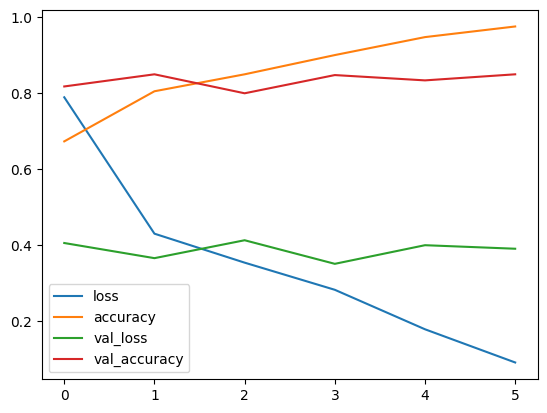

In [ ]:
pd.DataFrame(history.history).plot();

In [ ]:
history.history['val_accuracy']

[0.8180000185966492,
 0.8500000238418579,
 0.800000011920929,
 0.8479999899864197,
 0.8339999914169312,
 0.8500000238418579]

In [ ]:
epoch = np.arange(len(history.history['loss']))
epoch

array([0, 1, 2, 3, 4, 5])

In [ ]:
# plotting the loss and accuracy seperately:

def loss_accuracy_plot(history):

  # extract the essentials from the history

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = np.arange(len(history.history['loss']))

  fig,ax = plt.subplots(nrows=1,ncols=2,dpi=150)

  # plotting the loss
  ax[0].plot(epochs,train_loss,label='Training_Loss')
  ax[0].plot(epochs,val_loss,label='Validation_Loss')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].legend()

  # plotting the accuracy
  ax[1].plot(epochs,train_accuracy,label='Training_Accuracy')
  ax[1].plot(epochs,val_accuracy,label='Validation_Accuracy')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  ax[1].legend()

  # diplaying the plots
  plt.tight_layout(pad=2)
  plt.show()


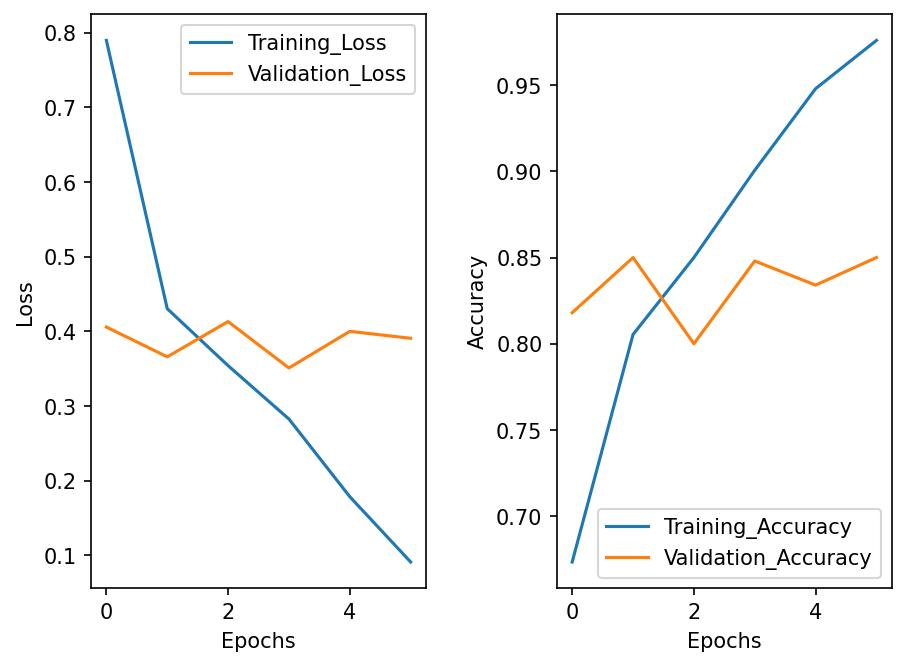

In [ ]:
loss_accuracy_plot(history)

# conclusion:
adding a bunch of Conv2D layers decreased the training_loss but kept the validation_loss(test_loss) almost unchanged what this might mean is our model might be in the inclination to overfit on the training data that it performs too well on the training data that the world outside its training appears a bit obscured to it that it doesn't perform as well.

# Increase and Decrease Overfitting:

# ways to increase the chance of overfitting on the training data:

1. increase conv layer
2. increase conv filters
3. increae dense layer
4. increase epoch size.


# ways to reduce overfitting on the training data:

1. Add data Augmentation.
2. Add data regularization layer such as MaxPool2D.
3. Add more data.

In [ ]:
# building a new model with regularization layer
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Rescaling(1./255))
model2.add(tf.keras.layers.Conv2D(
    filters=10,
    kernel_size=(3,3),
    strides=(1,1),
    padding='valid',
    activation='relu',
    input_shape=(224,224,3),
    name='input_layer'

))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))

# compile the model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# fit the model
history2 = model2.fit(train_data,
           epochs=6,
           steps_per_epoch=len(train_data),
           validation_data=test_data,
           validation_steps=len(test_data))

Epoch 1/6
47/47 [==============================] - 8s 136ms/step - loss: 0.6174 - accuracy: 0.6507 - val_loss: 0.4640 - val_accuracy: 0.8080
Epoch 2/6
47/47 [==============================] - 6s 118ms/step - loss: 0.4788 - accuracy: 0.7820 - val_loss: 0.3874 - val_accuracy: 0.8400
Epoch 3/6
47/47 [==============================] - 7s 132ms/step - loss: 0.4284 - accuracy: 0.8207 - val_loss: 0.3731 - val_accuracy: 0.8620
Epoch 4/6
47/47 [==============================] - 5s 92ms/step - loss: 0.3964 - accuracy: 0.8280 - val_loss: 0.3683 - val_accuracy: 0.8460
Epoch 5/6
47/47 [==============================] - 4s 82ms/step - loss: 0.3848 - accuracy: 0.8347 - val_loss: 0.3648 - val_accuracy: 0.8520
Epoch 6/6
47/47 [==============================] - 6s 116ms/step - loss: 0.3640 - accuracy: 0.8453 - val_loss: 0.3740 - val_accuracy: 0.8320


In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 input_layer (Conv2D)        (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)       

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 input_layer (Conv2D)        (None, 222, 222, 10)      280       
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 10)      910       
                                                                 
 conv2d_1 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 output_layer (Dense)        (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trai

# notice the improvements! the accuracy in test-data has dramatically increased and the number of total parameters has also decreased which means faster execution time.

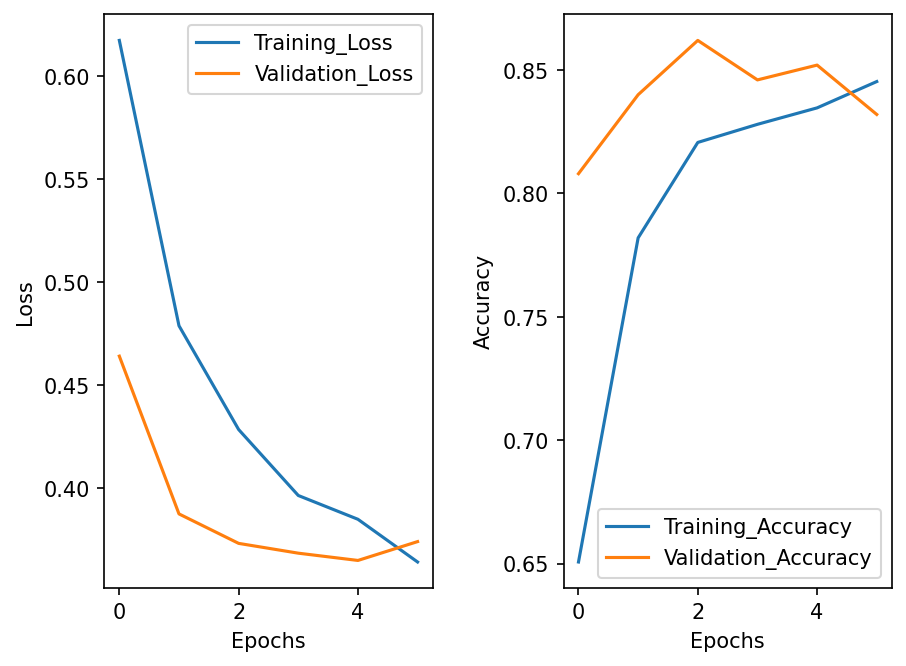

In [ ]:
loss_accuracy_plot(history2)

# day 155 and day 156, day 157,day 158

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import requests
from io import BytesIO
import os
import zipfile


In [2]:
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


--2023-08-22 13:30:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   242MB/s    in 0.4s    

2023-08-22 13:30:36 (242 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
zip = zipfile.ZipFile('pizza_steak.zip')
zip.extractall()
zip.close()

In [ ]:
!ls -ltr 'pizza_steak'

total 8
drwxr-xr-x 4 root root 4096 Aug 18 12:41 train
drwxr-xr-x 4 root root 4096 Aug 18 12:41 test


In [ ]:
!ls -ltr 'pizza_steak/train'

total 48
drwxr-xr-x 2 root root 24576 Aug 18 12:41 steak
drwxr-xr-x 2 root root 24576 Aug 18 12:41 pizza


# data augmentation:

* Data augmentation introduces randomness.

* Data augmentation introduces randomness by means of bringing variations to the way the images look in the training dataset.

* rotation,flip,height enhancement,width enhancement are some of the many changes that can be brought about.

* this variation to the image is brought about to train the model better so that if the model comes across real world data it will recognise and classify it better.


* **Data Augmentation is usually performed on the training data only.**


In [4]:
# creating the data_gen
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=0.2, # how much you want to rotate the image?
                             shear_range=0.2, # how much you want to shear the image(rotate diagonally)?
                             zoom_range=0.2, # how much you want to zoom in on the image?
                             horizontal_flip=True) # flip the image in landscape mode (upside downing)?

test_datagen = ImageDataGenerator(rescale=1./255)

'''vertical_flip would be about flipping the image in potrait mode'''


# train and test data seperation from the directory
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# connecting train_data with datagen for image augmentation.
augmented_train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                   batch_size=32,
                                                   target_size=(224,224),
                                                   class_mode='binary',
                                                   seed=42)



test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


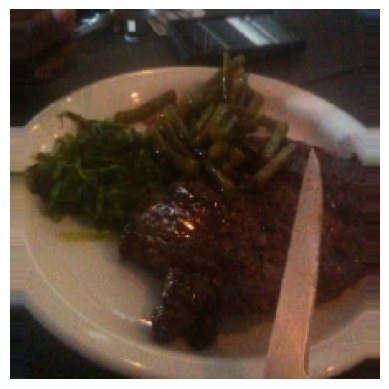

In [5]:
# image visualization of augmented images

# .next() method gets the images and labels out of the training data
images,labels = augmented_train_data.next()

random_index = np.random.choice(len(images))

plt.imshow(images[random_index])


plt.axis('off')
plt.show()

In [6]:
# build the model and test the performance

# build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='valid',
                                 activation='relu',
                                 input_shape=(224,224,3),
                                 name='input_layer'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))

# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# fit the model
history = model.fit(augmented_train_data,
                    epochs=6,
                    steps_per_epoch=len(augmented_train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/6
47/47 [==============================] - 35s 466ms/step - loss: 0.6327 - accuracy: 0.6327 - val_loss: 0.4854 - val_accuracy: 0.7600
Epoch 2/6
47/47 [==============================] - 21s 447ms/step - loss: 0.4658 - accuracy: 0.7960 - val_loss: 0.4037 - val_accuracy: 0.8360
Epoch 3/6
47/47 [==============================] - 23s 482ms/step - loss: 0.4555 - accuracy: 0.8040 - val_loss: 0.3613 - val_accuracy: 0.8420
Epoch 4/6
47/47 [==============================] - 21s 455ms/step - loss: 0.4259 - accuracy: 0.8053 - val_loss: 0.3408 - val_accuracy: 0.8360
Epoch 5/6
47/47 [==============================] - 20s 429ms/step - loss: 0.4022 - accuracy: 0.8220 - val_loss: 0.3252 - val_accuracy: 0.8480
Epoch 6/6
47/47 [==============================] - 21s 440ms/step - loss: 0.3980 - accuracy: 0.8167 - val_loss: 0.3198 - val_accuracy: 0.8540


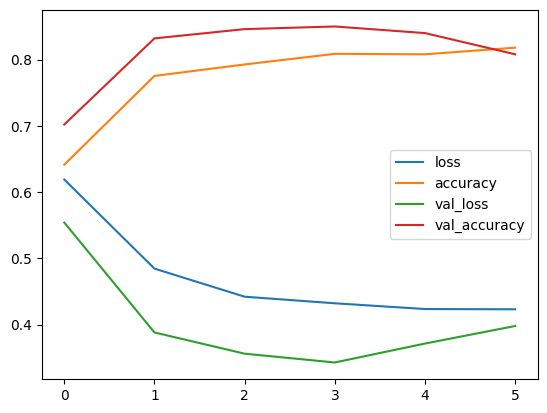

In [ ]:
pd.DataFrame(history.history).plot();

In [ ]:
len(augmented_train_data)

47

# improve the model's performance


1. increase the conv2d layers/maxpool2d layers
2. increase the number of filters in conv2d layer from 10 to 32 to 64.
3. find the ideal learning_rate for our problem and use that.
4. get more data (images).


In [ ]:
# add more layers in this model (more conv2d and maxpool2d)
# another change is we reduce epochs to 5

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(filters=10,
                                  kernel_size=(3,3),
                                  strides=(1,1),
                                  padding='valid',
                                  activation='relu',
                                  input_shape=(224,224,3),
                                  name='input_layer'))

model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))


# compile the model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# fit the model
history2 = model2.fit(augmented_train_data,
                      epochs=5,
                      steps_per_epoch=len(augmented_train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 447ms/step - loss: 0.6929 - accuracy: 0.5260 - val_loss: 0.6908 - val_accuracy: 0.5240
Epoch 2/5
47/47 [==============================] - 26s 558ms/step - loss: 0.6634 - accuracy: 0.6000 - val_loss: 0.6163 - val_accuracy: 0.6600
Epoch 3/5
47/47 [==============================] - 24s 507ms/step - loss: 0.5642 - accuracy: 0.7093 - val_loss: 0.4967 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 21s 452ms/step - loss: 0.5179 - accuracy: 0.7507 - val_loss: 0.5342 - val_accuracy: 0.7560
Epoch 5/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4673 - accuracy: 0.7887 - val_loss: 0.4081 - val_accuracy: 0.8280


# conclusion: there's not much difference i think so try adding more filters instead

In [7]:
# changes are adding more filters say 32 instead of 10 as in the previous model

model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Conv2D(filters=32,
                                  kernel_size=(3,3),
                                  strides=(1,1),
                                  padding='valid',
                                  activation='relu',
                                  input_shape=(224,224,3),
                                  name='input_layer'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))

# compile the model
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# fit the model
history3 = model3.fit(augmented_train_data,
                      epochs=5,
                      steps_per_epoch=len(augmented_train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 26s 497ms/step - loss: 0.6115 - accuracy: 0.6587 - val_loss: 0.4159 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 19s 409ms/step - loss: 0.4687 - accuracy: 0.7820 - val_loss: 0.3691 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 21s 441ms/step - loss: 0.4159 - accuracy: 0.8207 - val_loss: 0.2991 - val_accuracy: 0.8880
Epoch 4/5
47/47 [==============================] - 19s 410ms/step - loss: 0.3989 - accuracy: 0.8247 - val_loss: 0.3113 - val_accuracy: 0.8860
Epoch 5/5
47/47 [==============================] - 21s 443ms/step - loss: 0.3746 - accuracy: 0.8447 - val_loss: 0.3024 - val_accuracy: 0.8840


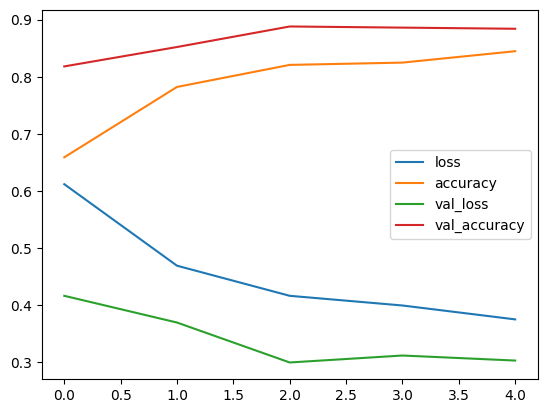

In [8]:
pd.DataFrame(history3.history).plot();

In [ ]:
# changes are: adding more filters say 64 instead of 10 as in the previous model

model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Conv2D(filters=64,
                                  kernel_size=(3,3),
                                  strides=(1,1),
                                  padding='valid',
                                  activation='relu',
                                  input_shape=(224,224,3),
                                  name='input_layer'))
model4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model4.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model4.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))

# compile the model
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# fit the model
history4 = model4.fit(augmented_train_data,
                      epochs=5,
                      steps_per_epoch=len(augmented_train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 27s 537ms/step - loss: 0.6169 - accuracy: 0.6560 - val_loss: 0.4528 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 20s 436ms/step - loss: 0.4651 - accuracy: 0.7873 - val_loss: 0.4169 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 22s 472ms/step - loss: 0.4901 - accuracy: 0.7813 - val_loss: 0.3329 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4206 - accuracy: 0.8153 - val_loss: 0.3408 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 24s 508ms/step - loss: 0.4176 - accuracy: 0.8080 - val_loss: 0.3967 - val_accuracy: 0.8180


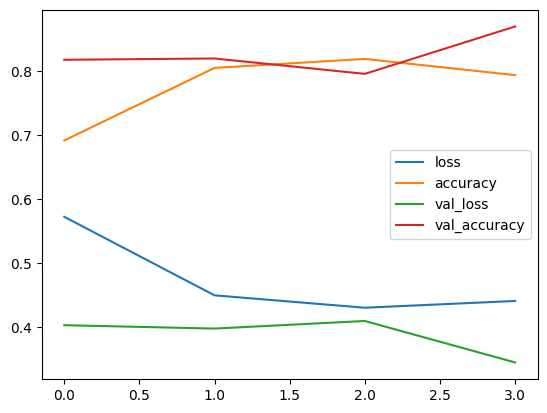

In [ ]:
pd.DataFrame(history4.history).plot();

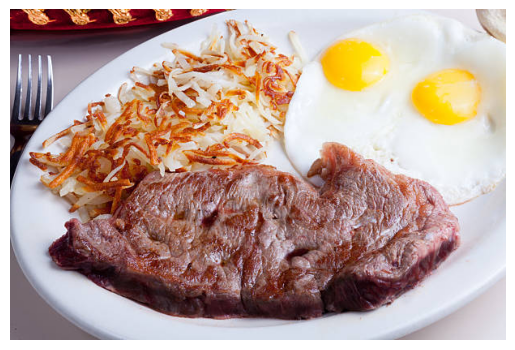

In [ ]:
# making prediction with the unseen data.

steak = image.imread('steak.jpg')

plt.imshow(steak)

plt.axis('off')

plt.show()

In [ ]:
model4.predict(steak)

ValueError: ignored

In [11]:
# load and preprocess the custom image to classify it with our model

def load_and_preprocess(filename,image_size):


  '''converts any image from internet into tensorflow readable'''

  # read the file
  read = tf.io.read_file(filename)

  # decode the read file
  decode = tf.image.decode_image(read)


  # resize it
  resize = tf.image.resize(decode,size=image_size)

  # rescale it
  rescale = resize/255.

  # expand it
  image = tf.expand_dims(rescale,axis=0)

  # return the image

  return image






In [ ]:
load_and_preprocess(filename='steak.jpg',image_size=(224,224))

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[1.7248024e-01, 2.1925645e-02, 3.2850016e-02],
         [2.0344698e-01, 1.2148607e-02, 3.3454001e-02],
         [1.4782850e-01, 1.5962655e-03, 1.1245752e-02],
         ...,
         [8.2408130e-01, 7.7314943e-01, 7.3861867e-01],
         [8.3052939e-01, 7.7562743e-01, 7.2933882e-01],
         [8.0857790e-01, 7.5262517e-01, 7.0059401e-01]],

        [[2.7899036e-01, 9.4006350e-03, 5.0664019e-02],
         [3.3487770e-01, 0.0000000e+00, 6.0908735e-02],
         [3.4825560e-01, 6.5701357e-03, 6.3130267e-02],
         ...,
         [8.5449499e-01, 8.0953038e-01, 7.7685422e-01],
         [8.0774987e-01, 7.5339246e-01, 7.1234030e-01],
         [7.9698807e-01, 7.4103534e-01, 6.8900424e-01]],

        [[3.3168828e-01, 2.5903484e-02, 7.6204851e-02],
         [3.4980431e-01, 2.9743116e-03, 6.2114842e-02],
         [3.9873824e-01, 2.0820774e-04, 6.8102255e-02],
         ...,
         [8.4569448e-01, 8.1046975e-01, 7.8602970e-01],


In [ ]:
# now predict this model

image = load_and_preprocess(filename='steak.jpg',image_size=(224,224))
model4.predict(image)

1/1 [==============================] - 0s 66ms/step


array([[0.8932569]], dtype=float32)

# exploration,analysis and freethrows

In [ ]:
# it is a shape error and we have to expand the dimension of the image

tf.expand_dims(steak,axis=0)

<tf.Tensor: shape=(1, 408, 612, 3), dtype=uint8, numpy=
array([[[[ 33,   4,   6],
         [ 38,   6,   9],
         [ 36,   0,   2],
         ...,
         [209, 195, 184],
         [210, 194, 181],
         [206, 188, 174]],

        [[ 44,   0,   4],
         [ 57,   6,  13],
         [ 58,   1,  10],
         ...,
         [208, 194, 183],
         [209, 193, 180],
         [204, 186, 172]],

        [[ 59,   0,   5],
         [ 74,   3,  17],
         [ 79,   2,  18],
         ...,
         [206, 192, 181],
         [206, 190, 177],
         [201, 183, 169]],

        ...,

        [[119, 107, 117],
         [119, 107, 117],
         [119, 107, 117],
         ...,
         [227, 227, 235],
         [227, 227, 235],
         [227, 227, 235]],

        [[120, 108, 118],
         [120, 108, 118],
         [119, 107, 117],
         ...,
         [227, 227, 235],
         [227, 227, 235],
         [227, 227, 235]],

        [[120, 108, 118],
         [120, 108, 118],
         [119, 107

In [ ]:
read = tf.io.read_file('steak.jpg')
read

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xe1\x00uExif\x00\x00II*\x00\x08\x00\x00\x00\x02\x00\x0e\x01\x02\x00:\x00\x00\x00&\x00\x00\x00\x98\x82\x02\x00\r\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00Steak, eggs and hashbrowns with fork, and partial sombreroSteve Kroeger\xff\xe1\x05Ohttp://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?>\n<x:xmpmeta xmlns:x="adobe:ns:meta/">\n\t<rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n\t\t<rdf:Description rdf:about="" xmlns:photoshop="http://ns.adobe.com/photoshop/1.0/" xmlns:Iptc4xmpCore="http://iptc.org/std/Iptc4xmpCore/1.0/xmlns/"   xmlns:GettyImagesGIFT="http://xmp.gettyimages.com/gift/1.0/" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:plus="http://ns.useplus.org/ldf/xmp/1.0/"  xmlns:iptcExt="http://iptc.org/std/Iptc4xmpExt/2008-02-29/" xmlns:xmpRights="http://ns.adobe.com/xap/1.0/rights/" dc:Rights="Steve Kroeger" ph

In [ ]:
decode = tf.image.decode_jpeg(read)
decode

<tf.Tensor: shape=(408, 612, 3), dtype=uint8, numpy=
array([[[ 33,   5,   4],
        [ 38,   6,   7],
        [ 36,   0,   0],
        ...,
        [209, 195, 182],
        [207, 193, 180],
        [204, 188, 173]],

       [[ 44,   0,   4],
        [ 55,   6,  12],
        [ 56,   0,   9],
        ...,
        [208, 194, 181],
        [206, 192, 179],
        [203, 187, 172]],

       [[ 56,   0,   2],
        [ 71,   3,  14],
        [ 78,   2,  15],
        ...,
        [206, 192, 179],
        [204, 190, 177],
        [200, 184, 169]],

       ...,

       [[119, 108, 116],
        [119, 108, 116],
        [118, 107, 115],
        ...,
        [225, 228, 233],
        [225, 228, 233],
        [225, 228, 233]],

       [[119, 108, 116],
        [119, 108, 116],
        [119, 108, 116],
        ...,
        [225, 228, 233],
        [225, 228, 233],
        [225, 228, 233]],

       [[119, 108, 116],
        [119, 108, 116],
        [119, 108, 116],
        ...,
        [225, 228, 23

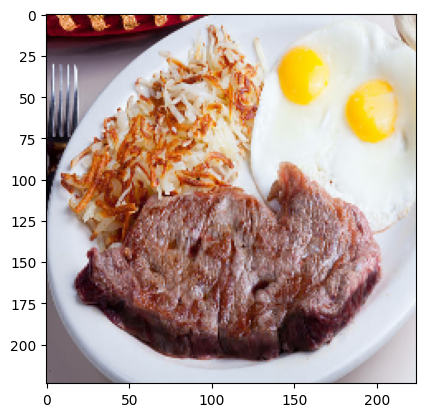

In [ ]:
resize = tf.image.resize(decode,size=(224,224))
rescale = resize/255.

plt.imshow(rescale);

# classify the image based on its name rather than giving out probability

In [9]:
class_names = sorted(os.listdir('pizza_steak/train'))

class_names

['pizza', 'steak']

In [ ]:
load_and_preprocess

<function __main__.load_and_preprocess(filename, image_size)>

In [ ]:
image = load_and_preprocess('steak.jpg',(224,224))
prediction = model4.predict(image)

class_names[int(np.round(prediction))]

1/1 [==============================] - 0s 29ms/step


'steak'

1/1 [==============================] - 0s 31ms/step


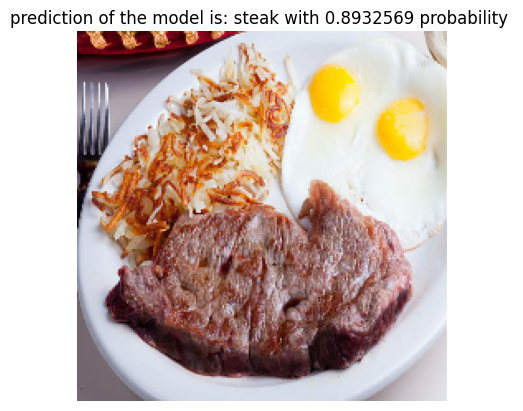

In [ ]:
def pred_and_plot(filename,image_size):

  # interpreting the image in tensor's language.
  image = load_and_preprocess(filename,image_size)

  # showing the image
  plt.imshow(tf.squeeze(image))

  # displaying the prediction label of the image as its title.
  prediction = model4.predict(image)
  prediction_label = class_names[int(np.round(prediction))]

  plt.title('prediction of the model is: %s with %s probability '%(prediction_label,prediction[0][0]))

  plt.axis('off')

  plt.show()

pred_and_plot('steak.jpg',(224,224))

In [ ]:
np.round(0.3)

0.0

In [ ]:
np.round(0.5)

0.0

In [ ]:
np.round(0.51)

1.0

In [10]:
# download another image and see if the model classifies it correctly.

!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

--2023-08-22 13:36:32--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15682 (15K) [text/plain]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]  15.31K  --.-KB/s    in 0.02s   

2023-08-22 13:36:33 (620 KB/s) - ‘03-steak.jpeg’ saved [15682/15682]



In [13]:
load_and_preprocess('03-steak.jpg',[224,224])

InvalidArgumentError: ignored

In [56]:
image_url = 'https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg'


In [32]:
# load and preprocess
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
import requests
from io import BytesIO


def load_and_preprocess(url,target_size):

  # get the contents of the image from its url
  contents = BytesIO(requests.get(url).content)

  # load the image formed from its contents and fix the target_size
  image = load_img(contents,target_size=target_size)

  # convert the image into computer readable pixelated numbers

  image_array = tf.constant(img_to_array(image))

  # rescale the image
  rescaled_array = image_array/255.

  # expand the dimension of the image at 0th axis
  preprocessed_image = tf.expand_dims(rescaled_array,axis=0)

  return preprocessed_image

In [35]:
model3.predict(load_and_preprocess(image_url,(224,224)))[0][0]

1/1 [==============================] - 0s 30ms/step


0.96411693

In [55]:
def classify_and_plot(model,image_url,target_size):

  # get the image in tensor format
  tensor_image = load_and_preprocess(image_url,target_size)

  # show the image
  plt.imshow(tf.squeeze(tensor_image))

  # make the prediction and set the title
  class_names = sorted(os.listdir('pizza_steak/train'))
  prediction = model.predict(tensor_image)
  prediction_label = class_names[int(np.round(prediction))]

  plt.title('predicted label is {}'.format(prediction_label))

  plt.axis('off')
  plt.show()




1/1 [==============================] - 0s 28ms/step


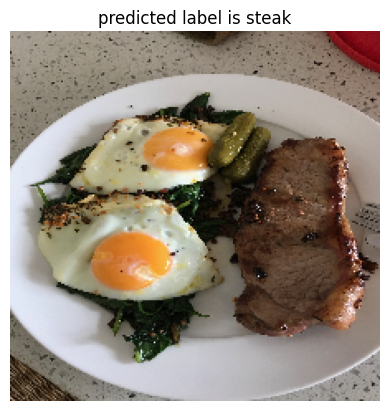

In [57]:
image_url = 'https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg'
classify_and_plot(model3,image_url,(224,224))

1/1 [==============================] - 0s 22ms/step


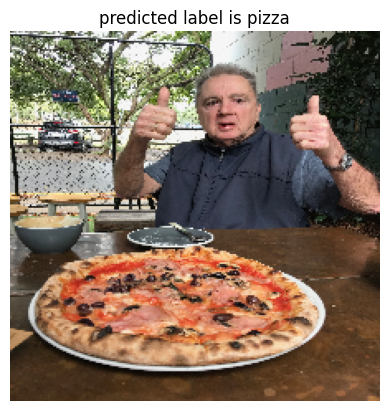

In [58]:
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg"

classify_and_plot(model3,image_url,(224,224))



1/1 [==============================] - 0s 28ms/step


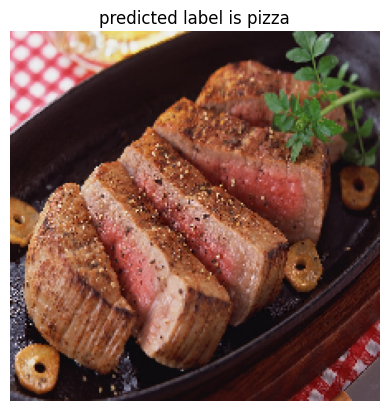

In [59]:
image_url = "https://www.wallpaperflare.com/static/996/642/376/meat-stake-cuts-profrying-wallpaper-preview.jpg"

classify_and_plot(model3,image_url,(224,224))

# it is obviously wrong!

1/1 [==============================] - 0s 19ms/step


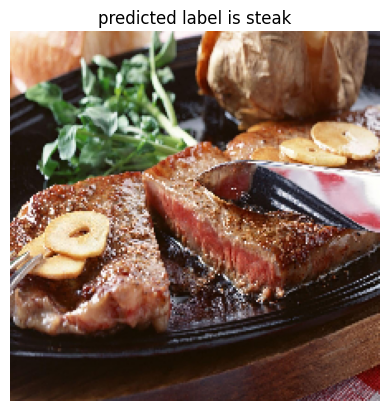

In [61]:
image_url = "https://www.wallpaperflare.com/static/92/212/18/stake-cut-knife-plug-wallpaper.jpg"

classify_and_plot(model3,image_url,(224,224))

1/1 [==============================] - 0s 20ms/step


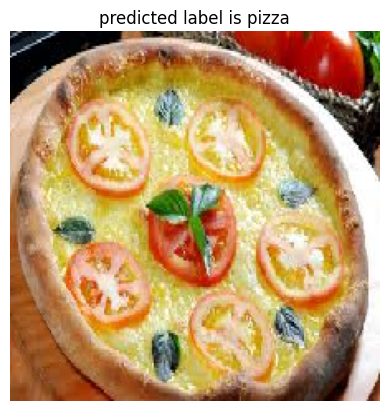

In [63]:
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEYq1UgectNo8SqY4G5oa_B_N5CVjwDZNOsg&usqp=CAU"
classify_and_plot(model3,image_url,(224,224))

1/1 [==============================] - 0s 20ms/step


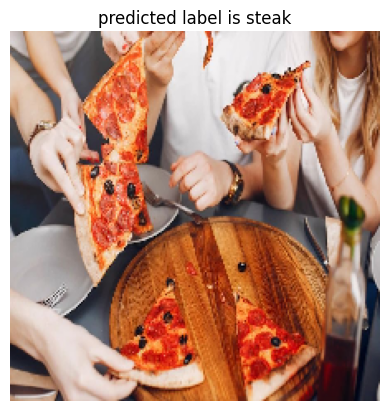

In [64]:
image_url = "https://www.india.com/wp-content/uploads/2022/06/WhatsApp-Image-2022-06-05-at-12.56.08-PM.jpeg"
classify_and_plot(model3,image_url,(224,224))

# the prediction/classification is obviously wrong!

# exploration,analysis and freethrows

In [37]:
class_names[int(np.round(model3.predict(load_and_preprocess(image_url,(224,224)))))]

1/1 [==============================] - 0s 21ms/step


'steak'

In [36]:
sorted(os.listdir('pizza_steak/train'))

['pizza', 'steak']

In [16]:
image_url = 'https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg'

response = requests.get(image_url)

response

<Response [200]>

In [17]:
response.content

Output hidden; open in https://colab.research.google.com to view.

In [20]:
BytesIO(response.content)

In [24]:
load_img(BytesIO(requests.get(image_url).content))

Output hidden; open in https://colab.research.google.com to view.